##### PyTorch Artificial Neural Network : ANN/MLP

It is a multicalss classification problem on faction MNIST data.

In [17]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


In [18]:
# Set Random Seeds for reproducibility
torch.manual_seed(42)

In [19]:
df = pd.read_csv('/Users/mekalathuruchenchaiah/Desktop/Programming/Deep Learing-PyTorch/data/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


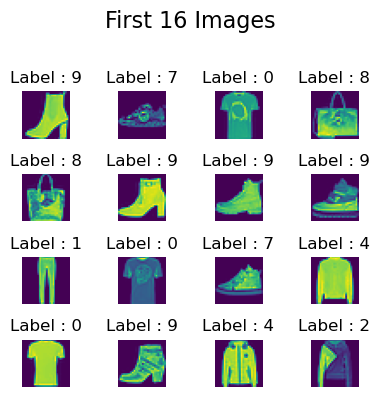

In [20]:
# Create a 4*4 grid of images
fig, axes = plt.subplots(4, 4, figsize =(4, 4))
fig.suptitle("First 16 Images", fontsize=16)

#Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28) # Reshape to 28*28
    ax.imshow(img) # Display in grayscale
    ax.axis('off') # Remove axis for a cleaner look
    ax.set_title(f"Label : {df.iloc[i, 0]}") # Show the label


plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to fit the title
plt.show()

In [21]:
# Train and test Split 
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Scaling the feature 
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [28]:
# Create a Custom Datasrt
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [32]:
# Create train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [33]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [34]:
# Create test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [35]:
# Create train and test loader 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True)
test_loader =DataLoader(test_dataset, batch_size=32, shuffle = False)

In [43]:
# Define NN Class
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [44]:
# Set Learning rate epochs
epochs = 100
learning_rate = 0.1

In [45]:
# instatiate the model
model = MyNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [47]:
len(train_loader)

150

In [49]:
# Training Loop 
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        #forward pass
        outputs = model(batch_features)
        #Calc Loss
        loss = criterion(outputs, batch_labels)
        # Back pass
        optimizer.zero_grad()
        loss.backward()

        #update grads
        optimizer.step()
        total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch : {epoch + 1}, Loss : {avg_loss}")


Epoch : 1, Loss : 0.00038669305611013744
Epoch : 2, Loss : 0.000380615118216762
Epoch : 3, Loss : 0.0003758522998638606
Epoch : 4, Loss : 0.00037398373526229987
Epoch : 5, Loss : 0.0003702665359742241
Epoch : 6, Loss : 0.000364274944246669
Epoch : 7, Loss : 0.00035918472304426055
Epoch : 8, Loss : 0.00035792700774133363
Epoch : 9, Loss : 0.0003539387990895193
Epoch : 10, Loss : 0.0003502351149897246
Epoch : 11, Loss : 0.00034733337811000334
Epoch : 12, Loss : 0.00034368113495778136
Epoch : 13, Loss : 0.00033727814718076843
Epoch : 14, Loss : 0.000335887479474574
Epoch : 15, Loss : 0.00033204158249039515
Epoch : 16, Loss : 0.0003299914391876276
Epoch : 17, Loss : 0.0003252114192825199
Epoch : 18, Loss : 0.0003234023182631063
Epoch : 19, Loss : 0.00031953134481833937
Epoch : 20, Loss : 0.00031846727841184475
Epoch : 21, Loss : 0.0003135603869426025
Epoch : 22, Loss : 0.00031096513164811766
Epoch : 23, Loss : 0.000309574343652154
Epoch : 24, Loss : 0.00030665469076969503
Epoch : 25, Loss 

In [ ]:
# Set the model Eval Mode

model.eval() # During training we will use batch normalization, drop out where it will be stopped if we tell the model to be in .eval() function

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [51]:
# Evaluation Code
total = 0
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]
        correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8416666666666667
